**Machine Learning**

--> In python there are some ML libraries like sklearn, keras or tensorflow.

**Supervised Machine Learning**

--> Supervised learning: It uses data that has labels. Example, there are orthopedic patients data that have labels normal and abnormal.

-->Aim is that as given features(input) predict whether target variable(output) is normal or abnormal

-->Classification: target variable consists of categories like normal or abnormal

-->Regression: target variable is continious like stock market

**KNN K-Nearest Neighbor**

--> KNN is one of the most basic yet essential classification algorithms in machine learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.



**Why do we need a KNN algorithm**

--> (K-NN) algorithm is a versatile and widely used machine learning algorithm that is primarily used for its simplicity and ease of implementation. It does not require any assumptions about the underlying data distribution. It can also handle both numerical and categorical data, making it a flexible choice for various types of datasets in classification and regression tasks. It is a non-parametric method that makes predictions based on the similarity of data points in a given dataset. K-NN is less sensitive to outliers compared to other algorithms.

The K-NN algorithm works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance. The class or value of the data point is then determined by the majority vote or average of the K neighbors. This approach allows the algorithm to adapt to different patterns and make predictions based on the local structure of the data.

**How to choose the value of k for KNN Algorithm?**
--> The value of k is very crucial in the KNN algorithm to define the number of neighbors in the algorithm. The value of k in the k-nearest neighbors (k-NN) algorithm should be chosen based on the input data. If the input data has more outliers or noise, a higher value of k would be better.


-->It is recommended to choose an odd value for k to avoid ties in classification. Cross-validation methods can help in selecting the best k value for the given dataset.

**Application of KNN:**


1) Data Preprocessing

2) Recognizing a pattern

3) Recommendation engine

**K-NEAREST NEIGHBORS (KNN)**

KNN: Look at the K closest labeled data points

Classification method.

First we need to train our data. Train = fit

fit(): fits the data, train the data.

predict(): predicts the data

--> We need to require sklearn libraries of implementation of KNN algorithm.


In [3]:
#KNN require library:

from sklearn.neighbors import KNeighborsClassifier

**Implementation of KNN algorithm**

In [14]:
# importing requires Libraries:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from scipy.stats import mode

from sklearn.neighbors import KNeighborsClassifier

In [15]:
# read a dataset from the .csv file

data = pd.read_csv('diabetes.csv')

In [16]:
data.head()       #To fetch first 5 rows.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [121]:
data.shape      #To check of shape of data.

(108, 9)

In [17]:
data.info()         #To fetch the infomation about dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               108 non-null    int64  
 1   Glucose                   108 non-null    int64  
 2   BloodPressure             108 non-null    int64  
 3   SkinThickness             108 non-null    int64  
 4   Insulin                   108 non-null    int64  
 5   BMI                       108 non-null    float64
 6   DiabetesPedigreeFunction  108 non-null    float64
 7   Age                       108 non-null    int64  
 8   Outcome                   108 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 7.7 KB


In [19]:
print(plt.style.available)  # look at available plot style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,108.00000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,4.37037,118.194444,68.592593,19.120370,71.916667,30.870370,0.472815,33.833333,0.351852
std,3.56932,33.399160,22.038215,16.289276,123.098860,9.412373,0.371791,11.086322,0.479774
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102000,21.000000,0.000000
25%,1.00000,98.500000,64.000000,0.000000,0.000000,25.300000,0.248000,24.750000,0.000000
50%,4.00000,113.500000,72.000000,20.000000,0.000000,31.350000,0.339500,31.000000,0.000000
75%,7.00000,139.500000,80.000000,32.000000,110.000000,37.225000,0.586250,41.000000,1.000000
max,15.00000,197.000000,122.000000,60.000000,846.000000,49.700000,2.288000,60.000000,1.000000


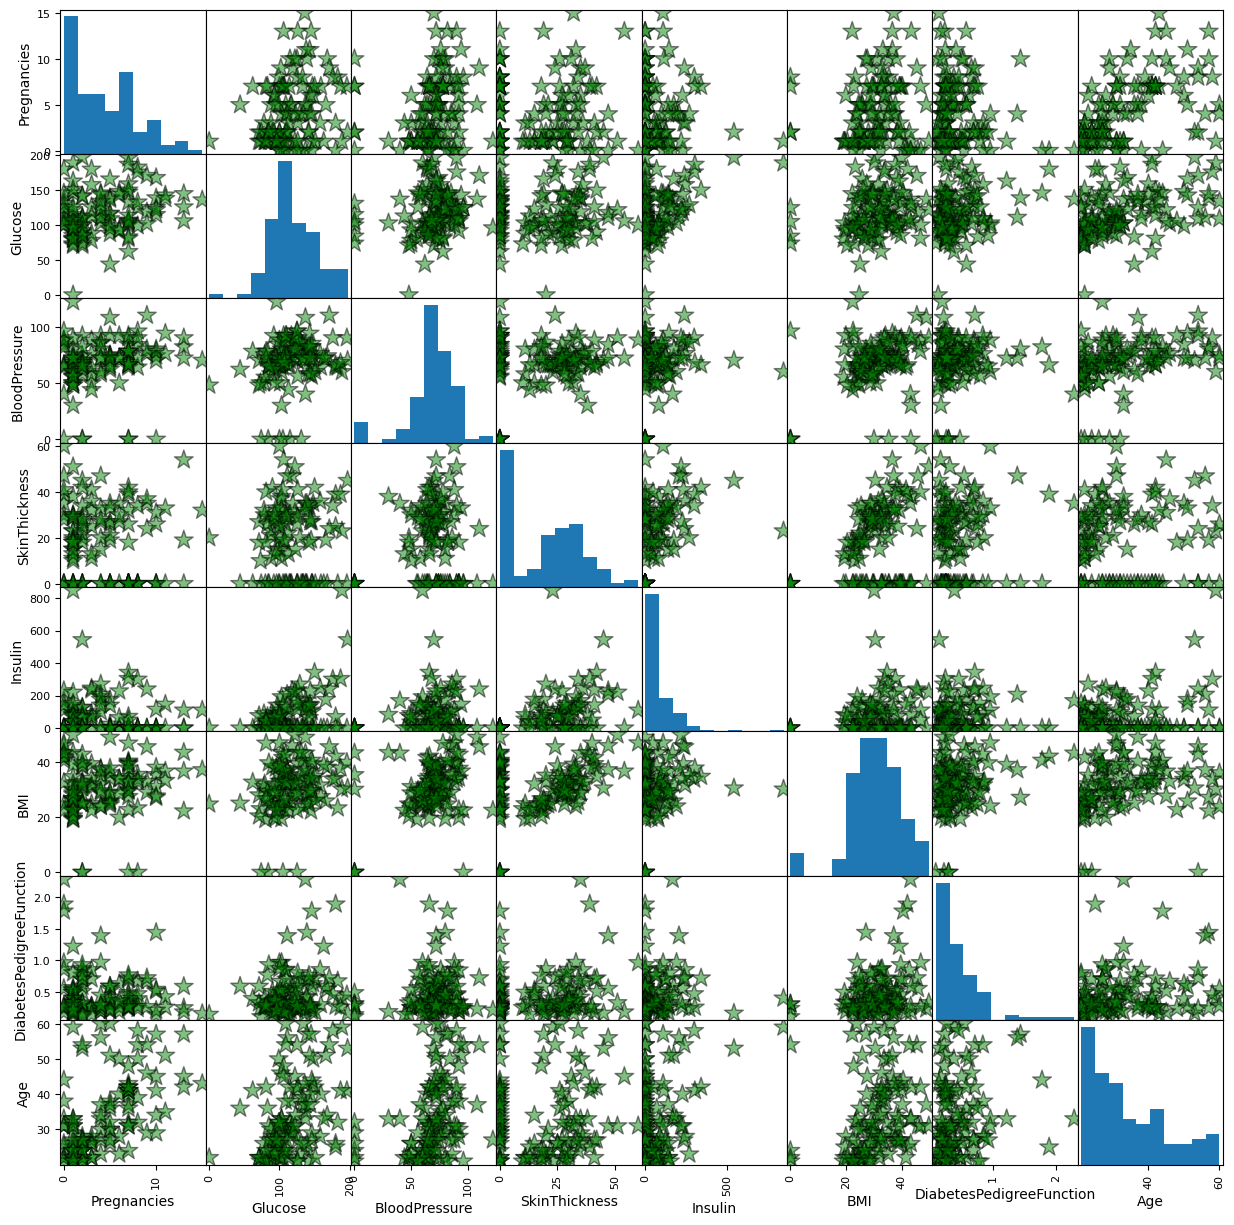

In [22]:
# Replace 'class' with the actual name of the column containing the labels 'Abnormal' and the other values.
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'Outcome']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'Outcome'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

In [33]:
data.loc[:,'Outcome'].value_counts()

Outcome
0    70
1    38
Name: count, dtype: int64

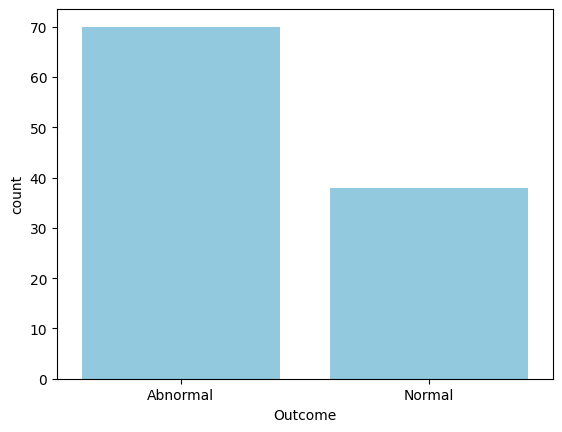

In [34]:
# In visualization :
sns.countplot(x="Outcome",data=data, color='skyblue')
plt.xticks(ticks=[0,1],labels=['Abnormal','Normal'])
plt.show()

In [107]:
knn = KNeighborsClassifier(n_neighbors = 2)      #The 2 closest labeled data points

# Define the x,y variables
x,y = data.loc[:,data.columns != 'Outcome'], data.loc[:,'Outcome']

# Fit the x,y variables into a KNN.
knn.fit(x,y)

prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]


Where,

--> **0 is a Abnormal**

-->**1 is a Normal**

Now, we need to split our data in train and test set.

x : feature

y : target variables (normal & abnormal)

test_size : It is a percentage of size. for example - test_size is 30% , It means that test size = 30% and train size =70%.

In [108]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [109]:
knn.fit(x_train,y_train)       # Fit the train and test data.

KNeighborsClassifier(n_neighbors=2)

In [122]:
x.shape

(108, 8)

In [110]:
prediction = knn.predict(x_test)   # Prediction of a x_test

In [111]:
print('With KNN (K=2) accuracy is: ',knn.score(x_test,y_test))   # for check the accuracy

With KNN (K=2) accuracy is:  0.696969696969697


**Accuracy is 69%.**

We chhose a K because of model complexity.

-> K is called as Hyperparameter. We need to choose it that gives a best performance.

-> Literature says, if k is small, model is complex model can lead to overfit. It means that model memorizes the train sets and cannot predict test set with good accuracy.


-> If k is big, model that is less complex model can lead to underfit.

In [129]:
# Model complexity
neig = np.arange(1, 25)    #To find each k accuracy.
train_accuracy = []
test_accuracy = []

In [130]:
# Loop over different values of k.
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

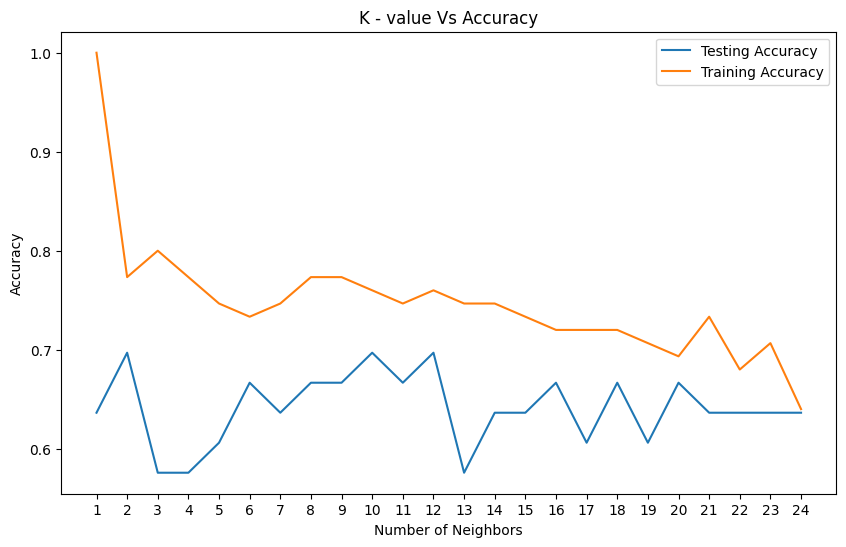

Best accuracy is 0.696969696969697 with K = 2


In [134]:
# Plot
plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K - value Vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))